In [1]:
import numpy as np

In [50]:
numeric_df = df.select_dtypes(include=[np.number])


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [43]:
import seaborn as sns

In [35]:
df = pd.read_csv('zomato.csv')

In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951


In [37]:
df.shape

(631, 7)

In [38]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

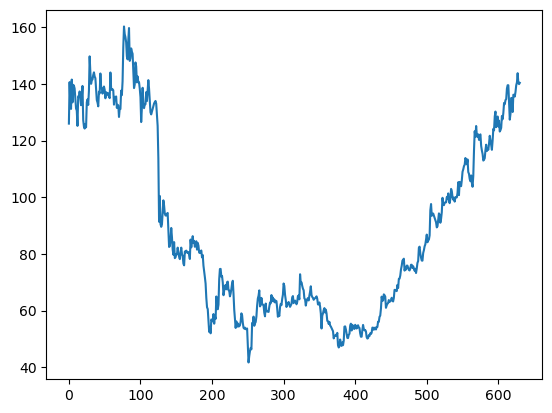

In [40]:
df['Close'].plot()

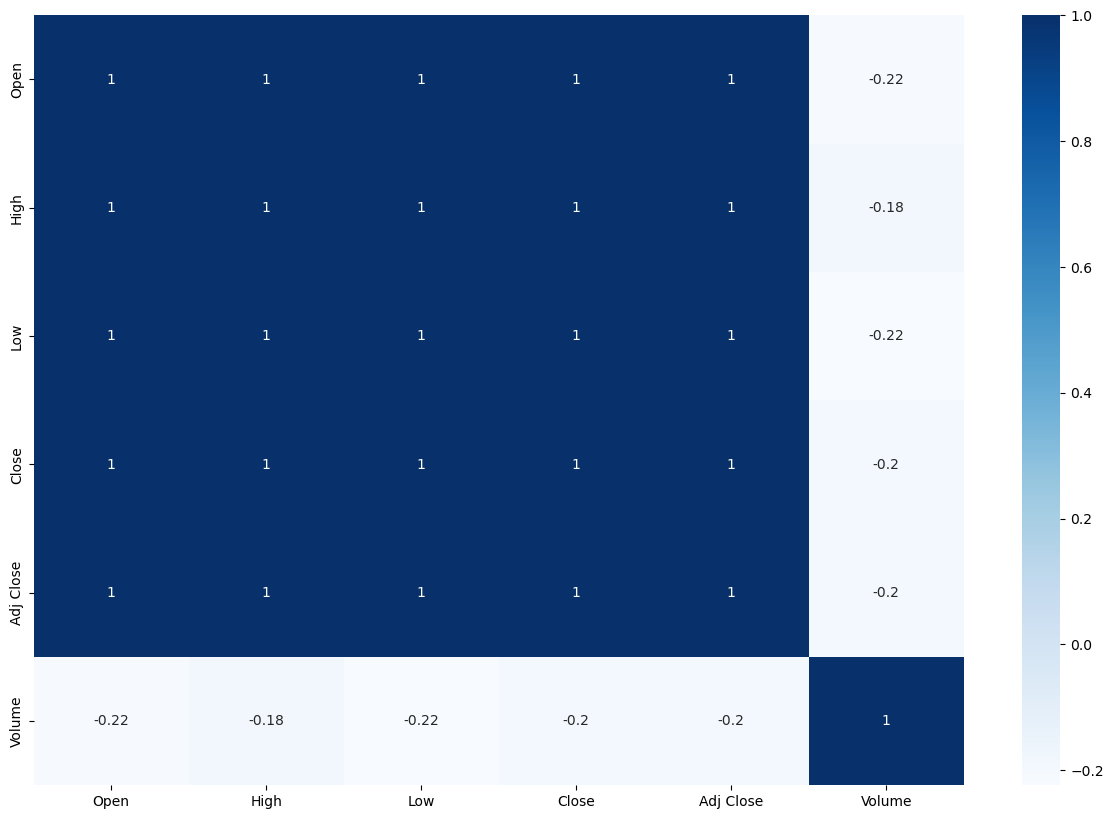

In [86]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.show()



In [67]:
X = df[['Open' , 'High' , 'Low' , 'Volume']].values
y = df['Close'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

regression = LinearRegression()

model = regression.fit(X_train,y_train)

y_pred = regression.predict(X_test)

In [76]:
predicted = regression.predict(X_test)

dframe= pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0       51.400002        51.145712
1       63.549999        64.221351
2       62.349998        62.196908
3       53.650002        53.171166
4       75.650002        76.021236
..            ...              ...
122     84.300003        84.618970
123    116.500000       116.972641
124     65.849998        66.764500
125     52.700001        52.962825
126     71.250000        70.527667

[127 rows x 2 columns]


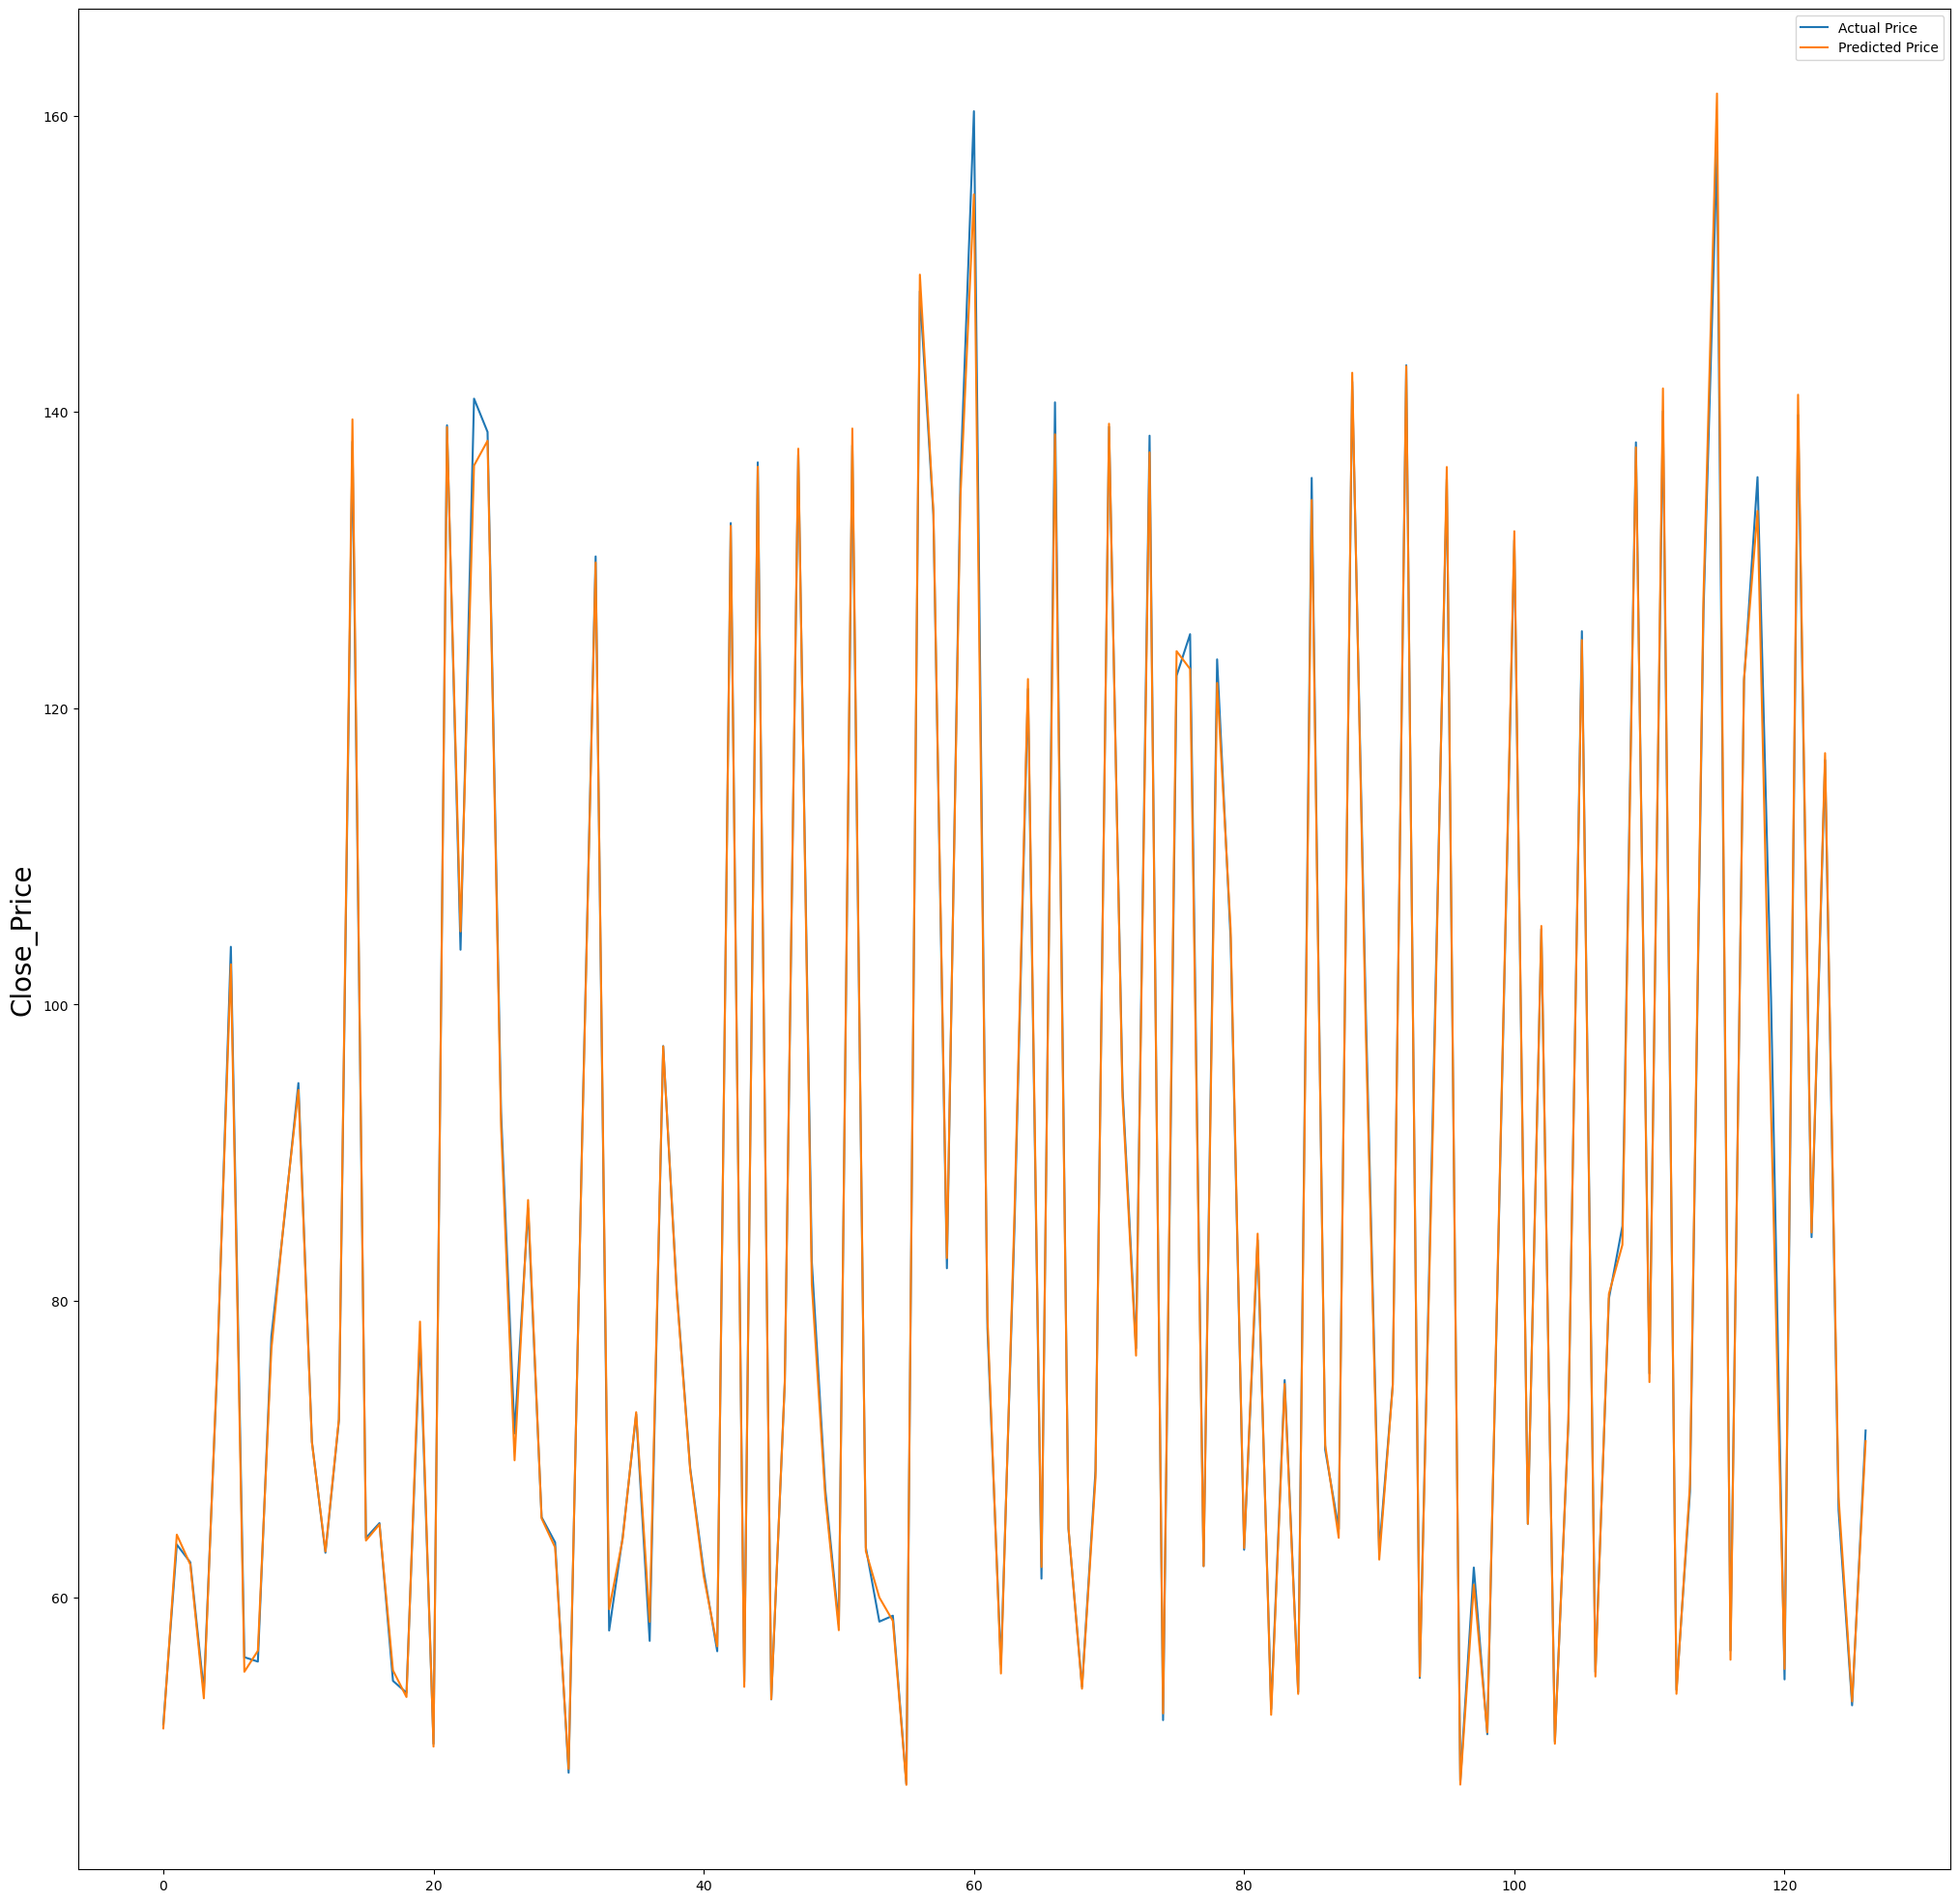

In [87]:
plt.figure(figsize=(25, 25))
plt.ylabel('Close_Price', fontsize=20)
plt.plot(dfr['Actual_Price'], label='Actual Price')  # Plot actual prices
plt.plot(dfr['Predicted_Price'], label='Predicted Price')  # Plot predicted prices
plt.legend()
plt.show()

<Axes: >

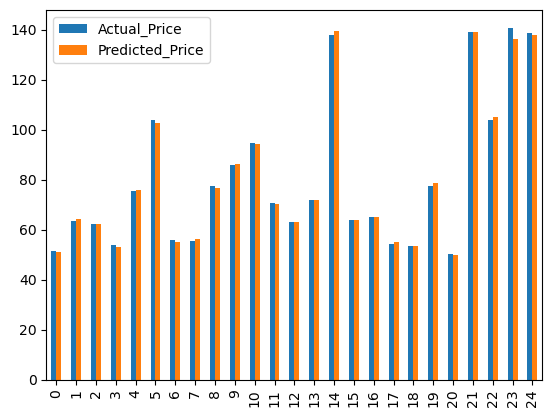

In [88]:
graph = dfr.head(25)
graph.plot(kind='bar')